images - Copy.jpeg
images.jpeg
[array([[ 99.,  95.,  90., ..., 162., 162., 161.],
       [103., 100.,  97., ..., 166., 166., 165.],
       [109., 107., 105., ..., 171., 172., 171.],
       ...,
       [ 79.,  81.,  80., ..., 125., 126., 125.],
       [ 91.,  92.,  91., ..., 128., 130., 130.],
       [ 91.,  96.,  99., ..., 130., 133., 134.]], dtype=float32), array([[ 99.,  95.,  90., ..., 162., 162., 161.],
       [103., 100.,  97., ..., 166., 166., 165.],
       [109., 107., 105., ..., 171., 172., 171.],
       ...,
       [ 79.,  81.,  80., ..., 125., 126., 125.],
       [ 91.,  92.,  91., ..., 128., 130., 130.],
       [ 91.,  96.,  99., ..., 130., 133., 134.]], dtype=float32)]


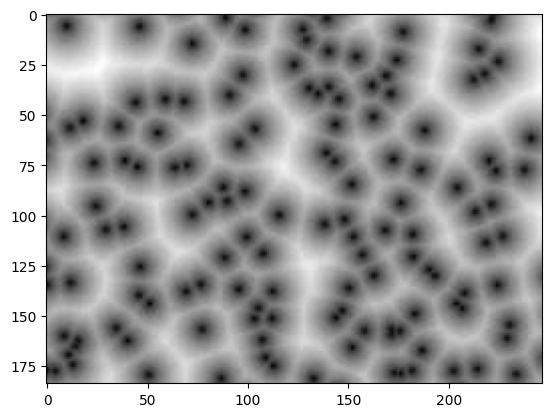

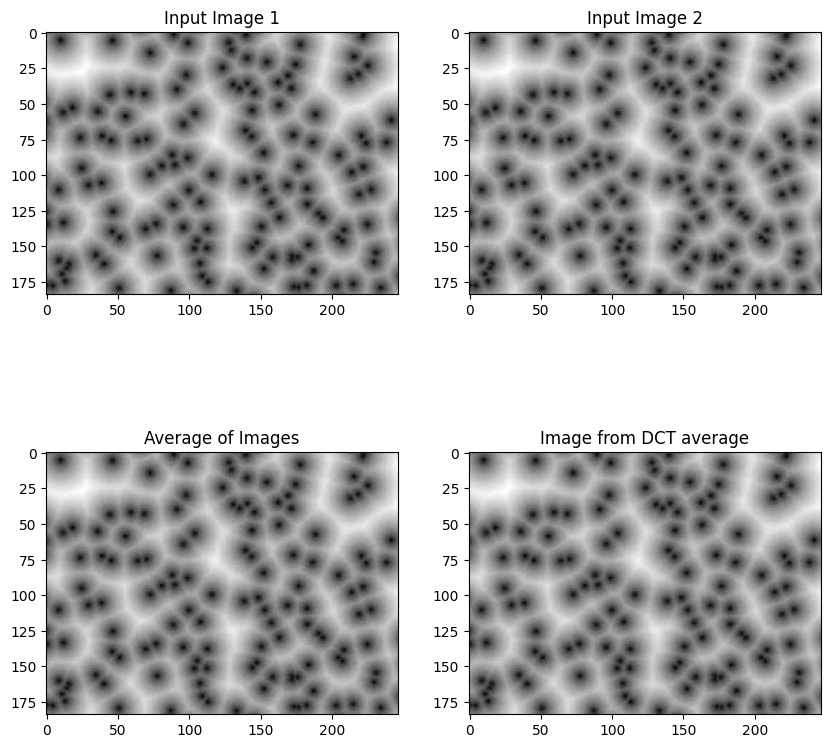

In [32]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.fftpack import dct, idct

from os import listdir

image_dir = "/content/success/"  # Path to image directory
# Load images
filenames = listdir(image_dir)
filenames.sort()
imgs = []
for f in filenames:
    print(f)
    imgs.append((cv2.imread(image_dir+f, 0)).astype(np.float32))
print(imgs)

height, width = imgs[0].shape

# Apply the weighted average to images and corresponding DCT images, respectively.
avg_img = np.zeros([height, width], np.float32)
dct_avg_img = np.zeros([height, width], np.float32)

for i in range(len(imgs)):
    avg_img = cv2.addWeighted(avg_img, i/(i+1.0), imgs[i], 1/(i+1.0), 0) #Original image average
    dct_avg_img = cv2.addWeighted(dct_avg_img, i/(i+1.0), dct(imgs[i]), 1/(i+1.0), 0) #DCT average


reverse_img = idct(dct_avg_img) #Convert averaged DCT back to real space.


plt.imshow( reverse_img, cmap="gray")
plt.imshow( avg_img, cmap="gray")


fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imgs[0], cmap='gray')
ax1.title.set_text('Input Image 1')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imgs[1], cmap='gray')
ax2.title.set_text('Input Image 2')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(avg_img, cmap='gray')
ax3.title.set_text('Average of Images')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(reverse_img, cmap='gray')
ax4.title.set_text('Image from DCT average')
plt.show()